In [1]:
# pip install torch

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn . linear_model import LinearRegression
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error
import math
import seaborn as sns

In [3]:
train_df = pd.read_csv("Train.csv")
valid_df = pd.read_csv("Validation.csv")
test_df = pd.read_csv("Test.csv")

In [4]:
X_train = train_df.iloc[:,0:1]
y_train = train_df.iloc[:,1]

X_valid = valid_df.iloc[:,0:1]
y_valid = valid_df.iloc[:,1]

X_test = test_df.iloc[:,0:1]
y_test = test_df.iloc[:,1]

In [5]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hiddenlayer_size):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size,hiddenlayer_size),
            nn.Sigmoid(),
            nn.Linear(hiddenlayer_size,1)
        )
        self.hiddenlayer_size = hiddenlayer_size
    def forward(self,X):
        return self.layers(X)


In [6]:
X_train_tensor, y_train_tensor = torch.tensor(X_train.values,dtype=torch.float32), torch.tensor(y_train.values,dtype=torch.float32)
X_valid_tensor, y_valid_tensor = torch.tensor(X_valid.values,dtype=torch.float32), torch.tensor(y_valid.values,dtype=torch.float32)
X_test_tensor, y_test_tensor = torch.tensor(X_test.values,dtype=torch.float32), torch.tensor(y_test.values,dtype=torch.float32)

C:\Users\Teja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([4594])) that is different to the input size (torch.Size([4594, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\Teja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([4594])) that is different to the input size (torch.Size([4594, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\Teja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-p

Text(0, 0.5, 'Loss')

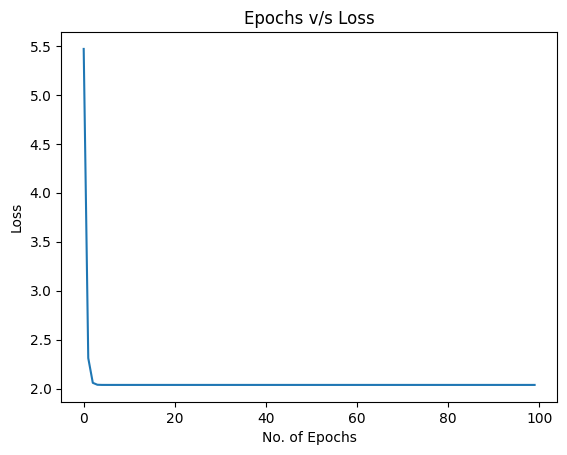

In [7]:
layers = [8,16,32,64]
min_rmse = 9999999
for l in layers:
    model = NeuralNetwork (input_size = 1, hiddenlayer_size = l)
    loss_function = nn.MSELoss ()
    optimiser = optim.SGD(model.parameters(), lr =0.01)
    mse_list = []

    for i in range(100):
        model.train()
        optimiser.zero_grad()
        output = model(X_train_tensor)
        loss = loss_function(output,y_train_tensor)
        loss.backward()
        mse_list.append(loss.item())
        optimiser.step()
    
    y_valid_pred = model(X_valid_tensor)
    y_valid_pred = y_valid_pred.detach().numpy()
    rmse = math.sqrt(mean_squared_error(y_valid_pred,y_valid))
    if(rmse < min_rmse):
        min_rmse = rmse
        min_Error_nnModel_rmseList = mse_list
        min_Error_nnModel = model
        best_layer = l
plt.plot(min_Error_nnModel_rmseList)
plt.title("Epochs v/s Loss")
plt.xlabel("No. of Epochs")
plt.ylabel("Loss")

In [8]:
y_train_pred_nn = min_Error_nnModel(X_train_tensor)
y_val_pred_nn = min_Error_nnModel(X_valid_tensor)
y_test_pred_nn = min_Error_nnModel(X_test_tensor)

rmse_train = math.sqrt(mean_squared_error(y_train_pred_nn.detach().numpy(),y_train))
rmse_val = math.sqrt(mean_squared_error(y_val_pred_nn.detach().numpy(),y_valid))
rmse_test = math.sqrt(mean_squared_error(y_test_pred_nn.detach().numpy(),y_test))

print(f'RMSE values for train val and test:\n{rmse_train}\n{rmse_val}\n{rmse_test}')
print(f'Best architecture for this task is {best_layer} hidden neurons')

RMSE values for train val and test:
1.4271528983885555
1.5187009526306687
1.4686939255438287
Best architecture for this task is 64 hidden neurons


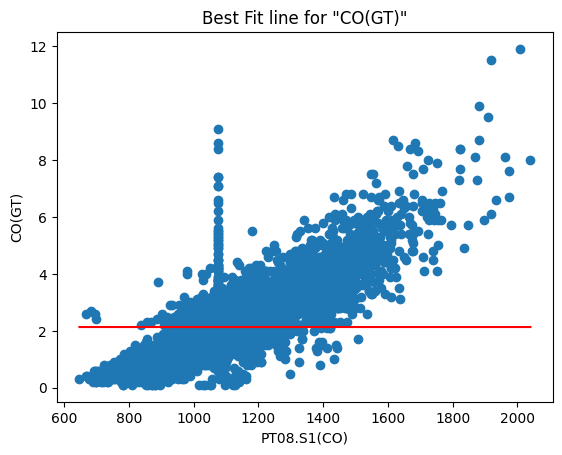

In [9]:
trainData = train_df.iloc[:, 0]
plt.plot(sorted(trainData), y_train_pred_nn.detach().numpy(), color="red")
plt.scatter(trainData, y_train)
plt.title('Best Fit line for "CO(GT)"')
plt.xlabel('PT08.S1(CO)')
plt.ylabel('CO(GT)')
plt.show()